# 学習結果の描画

score は学習の際に用いた値  
fitness は一定区間毎にモデルの当てはまりをテストした値

In [1]:
!python3 -m pip install seaborn

In [2]:
import os
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pwd

/Users/work/work-worldmodel2023/WorldModel2023/otk/AgileRL-MATD3/simple_world_comm_v3


In [4]:
# 保存済みの population を読み込み
path_pop = "./result/20240102-0837/pickle-population.pkl"

population = dill.load(open(path_pop,'rb'))

In [5]:
# population のなかに含まれる fitness を取り出す
fitnesses = [agent.fitness for agent in population]

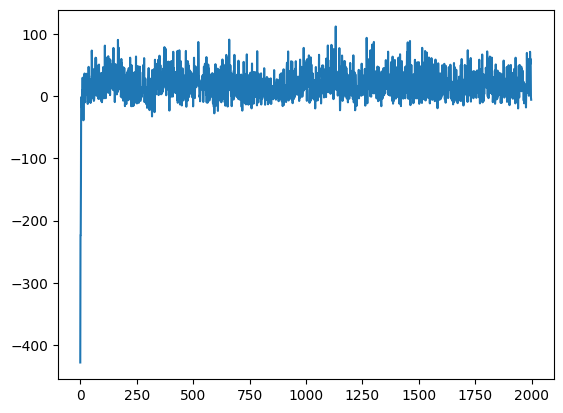

In [6]:
# fitnessを描画
plt.plot(fitnesses[0][0:-1])

In [7]:
print(fitnesses[0][0:20])

[-428.16352720690065, -223.6745590391864, -223.60058154880994, -137.0887123584697, -1.723306717661283, -17.005160975870073, -11.656897861682902, -17.014082172723054, 9.008600024033493, 0.7632923338909684, 29.545148642718427, 29.653055032456706, -8.008946646930026, 27.570069755055044, -38.75567164608095, 18.925973139376346, 12.782459466071673, 1.0646101071504805, 17.737716479931105, 36.394760214466785]


In [8]:
# Scoreを取り出す
scores = [agent.scores for agent in population]

print(scores[0][0:20])

[-119.079765248489, -77.05904226783326, 21.613821654388353, 4.6428713580950145, -47.891073808526706, -27.28783215508061, 22.517420179646358, -26.621712808911482, -19.499452276042234, -86.8286571118547, -33.492437652365545, -13.078568896237435, -8.74115006888499, -106.76478656043099, -84.36734073170162, -24.203004058684385, -63.62718557619867, -42.560873727288026, 0.48982697261164176, -2.7827275947035943]


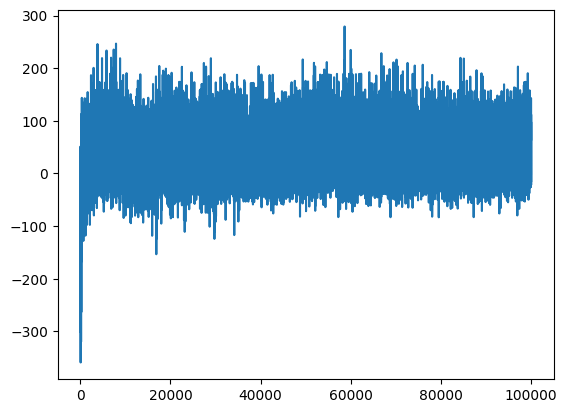

In [9]:
# Scoreを描画
plt.plot(scores[0][0:-1])

<Axes: >

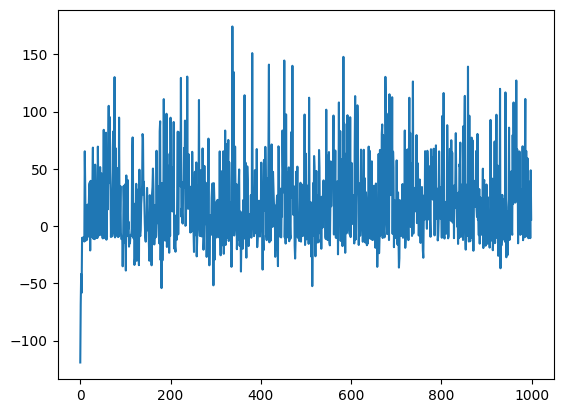

In [10]:
sns.lineplot(scores[0][0:-1:100], errorbar=('ci', 95))

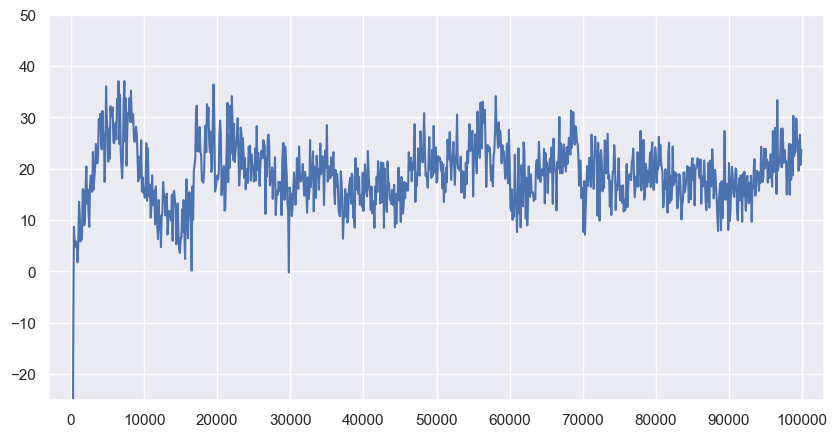

In [14]:
score = pd.DataFrame(scores[0][0:-1])
sns.set(rc={"figure.figsize": (10, 5)})

sns.lineplot(score.rolling(100, step=100).mean(), errorbar=('ci', 95), legend=False)

plt.xticks(np.arange(0, 103000, step=10000))
plt.xlim(-3000,103000)
plt.ylim(-25,50)

plt.savefig("score_simple_world_comm_v3.png")
plt.show()

In [12]:
score[1:101].mean()

0   -61.156722
dtype: float64